# Taller 5. Redes Convolucionales
Nombres: Manuel Sanchez y Allan Ramirez

## Parte I

En este ejercicio utilizaremos redes convolucionales para el problema de reconocimiento de digitos de MNIST. Como nuestro input en este caso sera procesado como una imagen (una matriz) y no como un vector podemos importarlo y procesarlo usando:

In [1]:
from tensorflow.keras.datasets import mnist

(train_images , train_labels), (test_images , test_labels) = mnist.load_data ()
train_images = train_images.reshape ((60000 , 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape ((10000 , 28, 28, 1))
test_images = test_images.astype("float32") / 255

Ya habiendo importado nuestros datos podemos construir nuestra primera red convolucional usando:

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape =(28, 28, 1))
x = layers.Conv2D(filters =32, kernel_size =3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Flatten ()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs , outputs=outputs)

Como podra ver, hemos definido nuestra red sin usar el API secuencial. Por el contrario, hemos definido la red capa por capa utilizando la funcion “layers” incluyendo al final como parametro la capa anterior. La accion de “layers” es como dibujar una flecha desde la capa que se recibe como parametro hasta esta capa que creo.

a) Utilice model.summary() para describir la red que creo. Describa sus observaciones.

In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

Este resumen describe cómo se creó y estructuró esta red neuronal convolucional, especificando el tipo de red, las dimensiones de entrada y salida de cada capa, y la cantidad de parámetros que se estiman para que la red aprenda. A continuación, se describe cada capa en detalle:

Capa de Entrada (Input Layer): La primera capa de la red tiene una entrada de tamaño 28×28. Esta capa prepara las imágenes para que la red pueda procesarlas y aprender de ellas.

Capa Convolucional 2D (Conv2D Layer): Esta capa realiza operaciones de convolución en las imágenes. Genera una salida de tamaño 26×26 al aplicar 32 filtros, lo que permite capturar características específicas de las imágenes. La capa usa 320 parámetros, los cuales se entrenan para extraer patrones relevantes en los datos de entrada.

Capa de MaxPooling 2D: En esta capa se reduce la dimensionalidad de los datos mediante una operación de agrupamiento, obteniendo una salida de tamaño 13×13. Mantiene los 32 mapas de características, lo que ayuda a reducir la complejidad del modelo sin perder información importante.

Capa de Flatten: Convierte la salida 3D de la capa de MaxPooling en un vector 1D de 5,408 elementos, preparándola para las capas completamente conectadas que siguen. Esta capa facilita que los datos pasen a las capas densas para la clasificación final.

Capa Densa (Dense Layer): La última capa es una capa densa o completamente conectada con 10 neuronas, donde cada neurona representa una clase de predicción. Esta capa permite asociar los patrones aprendidos en las capas anteriores con las posibles clases de salida (por ejemplo, los dígitos del 0 al 9 en el caso de reconocimiento de dígitos).

El modelo completo tiene un total de 54,410 parámetros, todos entrenables, lo que significa que cada parámetro se ajusta durante el entrenamiento

b) Pruebe el modelo definido arriba para sus datos de prueba. Utilice sparse_categorical_crossentropy como funcion de costo/p ́erdida. Describa sus observaciones ¿Cual es el mejor desempeno que logra con su red?

In [4]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(test_images, test_labels))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8873 - loss: 0.4100 - val_accuracy: 0.9747 - val_loss: 0.0866
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9763 - loss: 0.0828 - val_accuracy: 0.9766 - val_loss: 0.0776
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9829 - loss: 0.0596 - val_accuracy: 0.9806 - val_loss: 0.0616
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9851 - loss: 0.0498 - val_accuracy: 0.9812 - val_loss: 0.0567
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9838 - val_loss: 0.0518
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9832 - val_loss: 0.0549
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9911 - loss: 0.0303 - val_accuracy: 0.9825 - val_loss: 0.0547
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9925 - loss: 

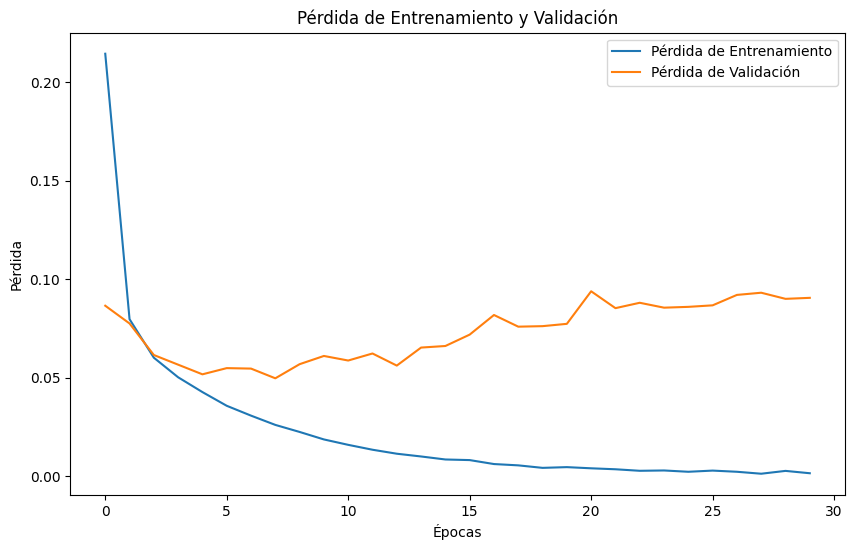

In [5]:
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Pérdida de Entrenamiento')
plt.plot(val_loss, label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()
plt.show()

Esta grafica nos ayuda a detectar posibles problemas de sobreajuste para determinar que tan alejado ese valor de perdida con el entrenamiento y de validacion, aunque graficamente da parecer que la diferencia es amplio pero en general menor de 0.01 por lo que problemas de sobreajuste realmente la red no la tiene pero si escogieramos por rendimiento, por costo computacional, tambien por evitar problema de sobreajuste podriamos elegir los resultados hasta la epoca 7 que funciona de manera muy similar si trabajaramos con 30 epocas.

In [6]:
train_loss_epoch = history.history['loss'][6]
val_loss_epoch = history.history['val_loss'][6]
train_accuracy_epoch = history.history['accuracy'][6]
val_accuracy_epoch = history.history['val_accuracy'][6]

print(f"Pérdida de Entrenamiento: {train_loss_epoch}")
print(f"Pérdida de Validación: {val_loss_epoch}")
print(f"Precisión de Entrenamiento: {train_accuracy_epoch}")
print(f"Precisión de Validación: {val_accuracy_epoch}")

Pérdida de Entrenamiento: 0.0307844877243042
Pérdida de Validación: 0.0546615794301033
Precisión de Entrenamiento: 0.9908666610717773
Precisión de Validación: 0.9825000166893005


Observando los resultados vemos que la diferencia entre los valores de perdida son bajos y para la precision de entrenamiento como validacion podemos identficar que realmente la red se encuentra muy bien entrenada y que la prediciones llegan a ser bastante precisas

c) (15 ptos) Divida de su conjunto de prueba en 2 para disponer de un conjunto de validacion. Incluya un par de capas convolucionales (con sus respectivas capas de pooling) adicionales en su red y un par de capas densas antes del output. Experimente con los hiperparametros y describa sus mejores resultados (su mejor red deberıa superar el 98.5% - 99% de acierto).

In [7]:
# Función para crear el modelo
def create_model(filters):
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=filters[0], kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Conv2D(filters=filters[1], kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Conv2D(filters=filters[2], kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Filtros para diferentes modelos
filters_list = [
    [8, 8, 8],  # Modelo 1
    [16, 16, 16],  # Modelo 2
    [32, 32, 32],  # Modelo 3
    [64, 64, 64],  # Modelo 3
]

# Entrenamiento y evaluación de cada modelo
history_dict = {}

for i, filters in enumerate(filters_list):
    print(f"\nEntrenando el Modelo {i+1} con filtros {filters}")
    model = create_model(filters)
    
    # Entrenamiento
    history = model.fit(train_images, train_labels, epochs=7, batch_size=32, validation_data=(test_images, test_labels))
    
    # Guardar el historial
    history_dict[f"model_{i+1}"] = history
    
    # Evaluar el modelo
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Pérdida en el conjunto de prueba del Modelo {i+1}: {test_loss}")
    print(f"Precisión en el conjunto de prueba del Modelo {i+1}: {test_accuracy * 100:.2f}%")


Entrenando el Modelo 1 con filtros [8, 8, 8]
Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7170 - loss: 0.8591 - val_accuracy: 0.9295 - val_loss: 0.2282
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9256 - loss: 0.2369 - val_accuracy: 0.9432 - val_loss: 0.1849
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9449 - loss: 0.1791 - val_accuracy: 0.9468 - val_loss: 0.1720
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9530 - loss: 0.1543 - val_accuracy: 0.9596 - val_loss: 0.1346
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9569 - loss: 0.1355 - val_accuracy: 0.9613 - val_loss: 0.1225
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9607 - loss: 0.1233 - val_accuracy: 0.9647 - val_loss: 0.1124
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9620 - loss: 0.1179 - val_accuracy: 0.9657 - val_loss: 0.1150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accu

Comose expreso en el inciso del punto se agregaron las nuevas capas convollucionales y polling y tambien como las capas densas, con la diferencias que cada modelo manejas dentro de sus capas filtros diferentes entonces el modelo cada capa conlucionales manejo un filtro 8, 16, 32 y 64 respectivamente, entonces los resultados fueron los siguientes y como en el ejercicio anterior no dimos cuenta que dese la epoca 7 se entrena bien y no genere sobreajuste cada moleto tiene esa misma cantidad de epocas. Ahora bien mostremos los resultados:

Modelo 1: Precision del 96.57%
Modelo 2: Precision del 98.06%
Modelo 3: Precision del 98.48%
Modelo 4: Precision del 98.69%

Como podemos ver de los resultados es conforme vamos aumentando los filtros a utilizar en la capas convolucionales permite entender que ayuda a la red a ser precisa e igualmente estar pendiente en que momento este parametro puede estar teniendo problemas en cuanto a costo computacional o temas de sobreajuste.

d) Experimente con variantes del pooling utilizado (puede probar otros tamaños de ventana y utilizar tambien L2 pooling). Describa sus resultados.

In [10]:
from tensorflow.keras import layers, models
from tensorflow import keras

# Función para crear el modelo con configuraciones de pooling
def create_model(pooling_type="max", pool_size=(2, 2)):
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
    
    # Aplicación de pooling según el tipo seleccionado
    if pooling_type == "max":
        x = layers.MaxPooling2D(pool_size=pool_size)(x)
    elif pooling_type == "average":
        x = layers.AveragePooling2D(pool_size=pool_size)(x)
    elif pooling_type == "L2":
        # L2 pooling usando reducción de dimensiones (Root Mean Square con reducción)
        x = layers.Lambda(lambda x: keras.backend.sqrt(
            keras.backend.pool2d(keras.backend.square(x), pool_size=pool_size, pool_mode='avg')
        ))(x)
    
    # Segunda capa convolucional y pooling
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    if pooling_type == "max":
        x = layers.MaxPooling2D(pool_size=pool_size)(x)
    elif pooling_type == "average":
        x = layers.AveragePooling2D(pool_size=pool_size)(x)
    elif pooling_type == "L2":
        x = layers.Lambda(lambda x: keras.backend.sqrt(
            keras.backend.pool2d(keras.backend.square(x), pool_size=pool_size, pool_mode='avg')
        ))(x)
    
    # Tercera capa convolucional y pooling
    x = layers.Conv2D(filters=64, kernel_size=1, activation="relu")(x)
    if pooling_type == "max":
        x = layers.MaxPooling2D(pool_size=pool_size)(x)
    elif pooling_type == "average":
        x = layers.AveragePooling2D(pool_size=pool_size)(x)
    elif pooling_type == "L2":
        x = layers.Lambda(lambda x: keras.backend.sqrt(
            keras.backend.pool2d(keras.backend.square(x), pool_size=pool_size, pool_mode='avg')
        ))(x)
    
    # Capas densas y de salida
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    
    # Compilación del modelo
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Configuración de variantes de pooling
pooling_variants = [
    {"type": "max", "size": (2, 2)},
    {"type": "average", "size": (2, 2)},
    {"type": "L2", "size": (2, 2)},
]

# Lista para almacenar resultados
results = []

# Entrenamiento y evaluación de cada variante
for i, config in enumerate(pooling_variants):
    print(f"\nEntrenando modelo {i+1} con {config['type']} pooling y tamaño {config['size']}")
    model = create_model(pooling_type=config['type'], pool_size=config['size'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels), verbose=0)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    results.append({"pooling_type": config['type'], "pool_size": config['size'], "loss": test_loss, "accuracy": test_accuracy})

# Mostrar resultados
for result in results:
    print(f"Pooling: {result['pooling_type']}, Tamaño: {result['pool_size']} -> Pérdida: {result['loss']:.4f}, Precisión: {result['accuracy']*100:.2f}%")



Entrenando modelo 1 con max pooling y tamaño (2, 2)

Entrenando modelo 2 con average pooling y tamaño (2, 2)

Entrenando modelo 3 con L2 pooling y tamaño (2, 2)

Pooling: max, Tamaño: (2, 2) -> Pérdida: 0.0589, Precisión: 98.18%
Pooling: average, Tamaño: (2, 2) -> Pérdida: 0.0702, Precisión: 97.75%
Pooling: L2, Tamaño: (2, 2) -> Pérdida: 2.3010, Precisión: 11.35%


Para este punto, trabajaremos con la misma arquitectura del punto anterior: tres capas convolucionales y dos capas densas. Sin embargo, en esta ocasión el número de filtros se fijará en 64 por capa, y lo que variará será el tipo de pooling utilizado para la reducción de dimensionalidad. Usaremos tres tipos de pooling:

MaxPooling (Máximo): Este fue el método utilizado inicialmente.
AveragePooling (Promedio): Calcula el promedio de los valores en la ventana de pooling.
L2 Pooling: Como no existe una función explícita en Keras para este tipo de pooling, implementaremos una función personalizada para simularlo, aplicando la raíz cuadrada de la media de los valores al cuadrado en la ventana.
Nota: Aunque no iteramos sobre el tamaño de la ventana en este experimento, incrementar el tamaño de la ventana reduce aún más la dimensionalidad de los datos. Sin embargo, un tamaño excesivo de la ventana podría afectar el rendimiento de la red, ya que puede eliminar demasiada información útil para el aprendizaje.

A continuación, se muestran los resultados de precisión obtenidos con cada tipo de pooling:

Modelo 1 (MaxPooling): Precisión 98.18%

Modelo 2 (AveragePooling): Precisión 97.75%

Modelo 3 (L2 Pooling): Precisión 11.35%

Como podemos ver el calculo del L2 pooling no resulta muy util para ejercicio aunque el AVerage Poolling resulta tambien util.

## Parte II Construccion de una RNC usando los datos de CIFAR10.
En un nuevo codigo main importamos las librer ́ıas necesarias y los datos:


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

(x_train , y_train), (x_test , y_test) = cifar10.load_data ()

# convert float 32 to have better efficiency
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32 ")/255.0


a) Investigue y describa que es la base de datos CIFAR10.

b) Describa preliminarmente los datos que utilizara su red (distribuciones, posibles valores de sus variables, dimensiones, etc.).


c) Construya una red convolucional a su gusto. Entrene dicha red y evaluela con sus datos. Se recomienda que divida su conjunto de prueba en dos para calibrar sus hiperparametros. Utilice model.summary() para explorar su modelo con mas detalle.


d) Experimente con diferentes arquitecturas y describa sus mejores resultados.


e) Investigue sobre el parametro “padding” y sobre el “batch normalization” (que ocasionalmente se utiliza en lugar del pooling). Experimente con ambos y describa sus
resultados.
